# signal analysis notebook
このノートブックでは、実際に筆者が書いた関数を呼び出し、それに基づいて信号の可視化を解析・解説しています。ソースコードは同じレポジトリ（src/utils.py）などを参照してください。


必要なパッケージのインストール

## メタデータ表示
信号波形は、デジタルな情報の羅列に過ぎません。そこで、それらを物理的に意味のある値として解釈するには、計測点と計測点の幅、使用したセンサの数（チャンネル数）と言ったファイル形式が重要です。これらをすべて出力することがまず必要になります。  
特に、エアリフトの実験においては2023年と2024年でデータ形式・ファイルの命名記法が大きくことなるので、それに応じた処理を行うことが重要です。

In [5]:
from src import analyze_mat_file
if __name__ == "__main__":
    file_path = "/home/matsubara/database/signal_mat/s3_g0_l2_t2.mat"  # Update with your file path
    analyze_mat_file(file_path)

Analyzing: /home/matsubara/database/signal_mat/s3_g0_l2_t2.mat
File size: 3973.64 MB
Successfully loaded .mat file

=== File Metadata ===
__header__: b'PicoScope 7 T&M, Created on: 2025?6?9?'
__version__: 1.0
__globals__: []

=== Variables ===

Variable 1: Tstart
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: float32
  Min: 0.0
  Max: 0.0
  Mean: 0.0

Variable 2: Tinterval
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: float64
  Min: 1.9199999812258284e-08
  Max: 1.9199999812258284e-08
  Mean: 1.9199999812258284e-08

Variable 3: ExtraSamples
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 0
  Max: 0
  Mean: 0.0

Variable 4: RequestedLength
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 260416669
  Max: 260416669
  Mean: 260416669.0

Variable 5: Length
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 260416669
  Max: 260416669
  Mean: 260416669.0

Variable 6: Version
  Type: <class 

/home/matsubara/Scripts/sandbox/psdata2matlab/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:136: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


  Mean: nan

Variable 8: B
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -inf
  Max: inf
  Mean: nan

Variable 9: C
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -inf
  Max: inf
  Mean: nan

Variable 10: D
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -2.7299413681030273
  Max: 2.553816080093384
  Mean: -0.0015690232394263148

Total variables: 10

=== Nested Structures ===

Structure of: Tstart
Array: shape=(1, 1), dtype=float32

Structure of: Tinterval
Array: shape=(1, 1), dtype=float64

Structure of: ExtraSamples
Array: shape=(1, 1), dtype=int32

Structure of: RequestedLength
Array: shape=(1, 1), dtype=int32

Structure of: Length
Array: shape=(1, 1), dtype=int32

Structure of: Version
Array: shape=(1,), dtype=<U11

Structure of: A
Array: shape=(1, 260416673), dtype=float32

Structure of: B
Array: shape=(1, 260416673), dtype=float32

Structure of: C
Array: shape=(1, 260416

Loading data...
loading success
cuda
Found 60 triggered pulses
Hilbert transform matrix shape: (60, 5208) (number of pulses x number of samples)
パルス数: 60
画像を保存しました: /home/matsubara/database/tmp/P20240726-1600_tdx1.png
信号波形データを保存しました: /home/matsubara/database/tmp/P20240726-1600_tdx1.npy


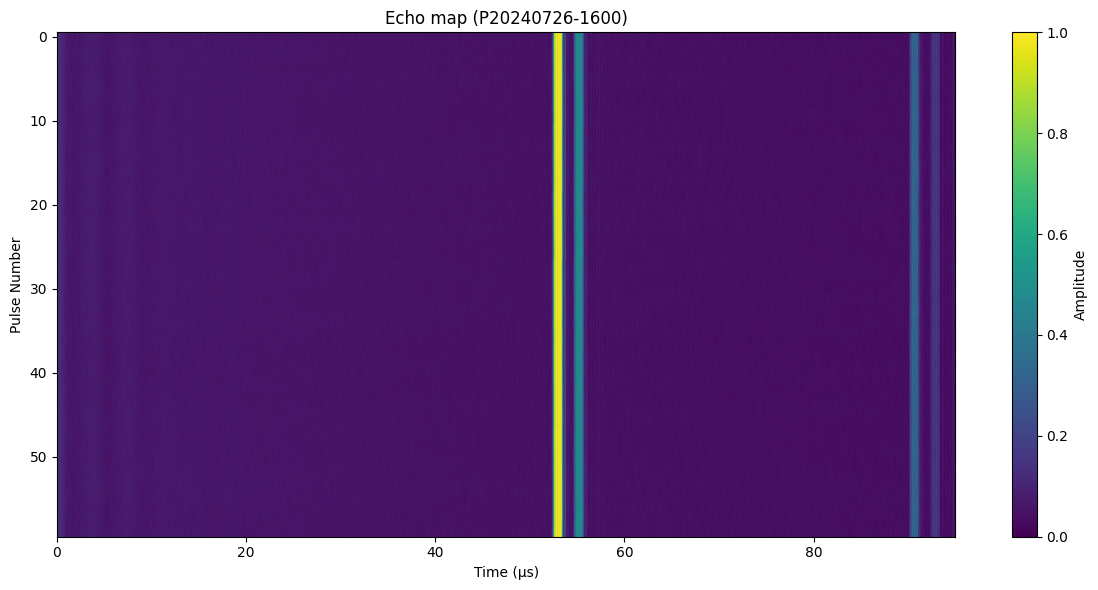

<Figure size 1500x1200 with 0 Axes>

In [4]:
from src import generate_echomap

file_path = "/home/matsubara/database/signal_mat/P20240726-1600.mat"
save_dir = "/home/matsubara/database/tmp"
triggered_pulses, adjusted_time_us, mean_pulse, std_pulse = generate_echomap(
    file_path, 
    start_time=2, 
    duration=0.02,
    window_width=100e-6, 
    amplitude_threshold=2.0, 
    output_dir=save_dir)

## トリガー検出
超音波波形データを画像に変換する上で最も重要なのは、その信号を並び替えるということです。では、何を基準に並べるべきなのか？それは、超音波を照射するためにトランスデューサを強制的に振動させた点を起点として、そこから信号を並べるという操作です。
これらファイルの共通する性質として、超音波を３ｋHzで5秒間照射し、その反射波や透過波を計測した信号波形であるというものがあります。これらによって3つのトランスデューサに信号波形が記録されるという形式になります。
ではここで、一つの信号からトリガーを検出する、という関数を実行して挙動を見てみましょう。
### 注）
見るべき系の大きさは大体150㎜程度、すなわち音波にして100μsの領域です。つまり、一秒間に照射できる回数は、最大でも10k回です。現在は3khzの設定なので、見るべき時間幅は0.1msとしています。

In [2]:
from src import detect_triggers_from_signal
if __name__ == "__main__":
    # Example of detection from MAT file
    try:
        file_path = "/home/matsubara/database/signal_mat/P20241203-1005.mat"
        start_time = 0.0  # Start time in seconds
        duration = 1.0   # Duration in seconds
        amplitude_threshold = 2  # Amplitude threshold
        
        triggers, signal_chunk, fs = detect_triggers_from_signal(
            file_path=file_path,
            start_time=start_time,
            duration=duration,
            amplitude_threshold=amplitude_threshold,
            window_width=0.0001  # 0.1ms
        )
        
        print(f"Sampling frequency: {fs} Hz")
        print(f"Detected triggers: {len(triggers)}")
        print(f"Signal chunk length: {len(signal_chunk)} samples")
        
        # Display trigger times in seconds
        trigger_times = [t / fs for t in triggers]
        print(f"Trigger times (seconds): {len(trigger_times)}")
        
    except Exception as e:
        print(f"Error: {e}") 

Loading data...
Loading successful
Using device: cuda
Number of detected triggers: 2988
Sampling frequency: 52083333.842615336 Hz
Detected triggers: 2988
Signal chunk length: 52083333 samples
Trigger times (seconds): 2988


## 画像化
これら検出されたトリガー点から300μsの範囲を切り出し、縦に並べたものが以下のようになります。左が生波形のプロット、右がヒルベルト変換後のプロットを示しています。

In [1]:
import numpy as np
import scipy.io as sio
import torch
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import os
from src import extract_waveforms_with_hilbert, extract_waveforms_from_trigger_times

# 使用例
if __name__ == "__main__":
    # TDX1からトリガーを検出済みという前提
    from trigger_detection import detect_triggers_from_signal
    
    file_path = "/home/matsubara/database/signal_mat/P20241203-1005.mat"
    start_time = 1e-9
    duration = 1
    amplitude_threshold = 2.0
    
    # 1. TDX1からトリガーを検出
    trigger_points, chunk, Fs = detect_triggers_from_signal(
        file_path=file_path,
        start_time=start_time,
        duration=duration,
        amplitude_threshold=amplitude_threshold,
        window_width=0.0001  # 0.1ms
    )
    
    # トリガー時刻を計算
    trigger_times = np.array(trigger_points) / Fs + start_time
    
    # 2. 全チャンネルから300μsの波形を切り出し（ヒルベルト変換込み）
    channels = ["TDX1", "TDX2", "TDX3", "TDX1_enlarged"]
    results = extract_waveforms_with_hilbert(
        file_path=file_path,
        channels=channels,
        trigger_times=trigger_times,
        starting_window=2e-6,  # -50μs
        ending_window=250e-6,    # +250μs（合計300μs）
        neglect_time=1e-6,      # 初期55μsを除去
        output_dir="/home/matsubara/database/tmp"
    )
    
    # 3. 平均波形をプロット
    #plot_average_waveforms(results, output_dir="/home/matsubara/database/tmp")
    
    print("\n=== Processing Complete ===")
    for channel, data in results.items():
        print(f"{channel}: {data['n_pulses']} pulses processed")

Loading data...
Loading successful
Using device: cuda
Number of detected triggers: 2988
Loading data...
Loading successful
Using device: cuda
Number of pulses: 2988
Window width: 248.0 μs
Neglect time: 1.0 μs
Processing channel TDX1...
Applying Hilbert transform to 2988 pulses...
Channel TDX1: Processed 2988 pulses
Hilbert matrix shape: (2988, 12916)
Trimmed matrix shape: (2988, 12864)
Saved comparison image: /home/matsubara/database/tmp/P20241203-1005_TDX1_hilbert_comparison.png
Saved Hilbert image: /home/matsubara/database/tmp/P20241203-1005_TDX1_hilbert_only.png
Processing channel TDX2...
Applying Hilbert transform to 2988 pulses...
Channel TDX2: Processed 2988 pulses
Hilbert matrix shape: (2988, 12916)
Trimmed matrix shape: (2988, 12864)
Saved comparison image: /home/matsubara/database/tmp/P20241203-1005_TDX2_hilbert_comparison.png
Saved Hilbert image: /home/matsubara/database/tmp/P20241203-1005_TDX2_hilbert_only.png
Processing channel TDX3...
Applying Hilbert transform to 2988 pul

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

## 画像の切り出し
図を見ればわかる通り、信号波形には不要な情報も多く含まれています。例えば、実際に超音波ビームがビニル管の外壁に到達してそれが帰ってくるまでの時間に、管内の重要な情報はみられません。そのような情報を切り出して並べる操作が必要になります。

In [2]:
import numpy as np
import scipy.io as sio
import torch
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import os
from src import extract_waveforms_with_hilbert, extract_waveforms_from_trigger_times
from trigger_detection import detect_triggers_from_signal
import os
file_path = "/home/matsubara/database/signal_mat/P20240729-1423.mat"
channels = ["TDX1", "TDX2", "TDX3", "TDX1_enlarged"]
start_time = 1e-9
duration = 1
amplitude_threshold = 2.0
trigger_points, chunk, Fs = detect_triggers_from_signal(
        file_path=file_path,
        start_time=start_time,
        duration=duration,
        amplitude_threshold=amplitude_threshold,
        window_width=0.0001  # 0.1ms
    )
    
    # トリガー時刻を計算
trigger_times = np.array(trigger_points) / Fs + start_time

results = extract_waveforms_with_hilbert(
        file_path=file_path,
        channels=channels,
        trigger_times=trigger_times,
        starting_window=-2e-6,  # 
        ending_window=100e-6,    # 
        neglect_time=55e-6,      # elusive time
        flow_velocity=1.0,
        output_dir="/home/matsubara/database/tmp"
    )

Loading data...
Loading successful
Using device: cuda
Number of detected triggers: 2989
Loading data...
Loading successful
Using device: cuda
Number of pulses: 2989
Window width: 102.0 μs
Neglect time: 55.0 μs
Processing channel TDX1...
Applying Hilbert transform to 2988 pulses...
Channel TDX1: Processed 2988 pulses
Hilbert matrix shape: (2988, 5312)
Trimmed matrix shape: (2988, 2448)
Saved comparison image: /home/matsubara/database/tmp/P20240729-1423_TDX1_hilbert_comparison.png
Saved Hilbert image: /home/matsubara/database/tmp/P20240729-1423_TDX1_hilbert_only.png
Processing channel TDX2...
Applying Hilbert transform to 2988 pulses...
Channel TDX2: Processed 2988 pulses
Hilbert matrix shape: (2988, 5312)
Trimmed matrix shape: (2988, 2448)
Saved comparison image: /home/matsubara/database/tmp/P20240729-1423_TDX2_hilbert_comparison.png
Saved Hilbert image: /home/matsubara/database/tmp/P20240729-1423_TDX2_hilbert_only.png
Processing channel TDX3...
Applying Hilbert transform to 2988 pulses

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Loading data...
loading success
cuda
Found 3000 triggered pulses
Hilbert transform matrix shape: (3000, 5208) (number of pulses x number of samples)


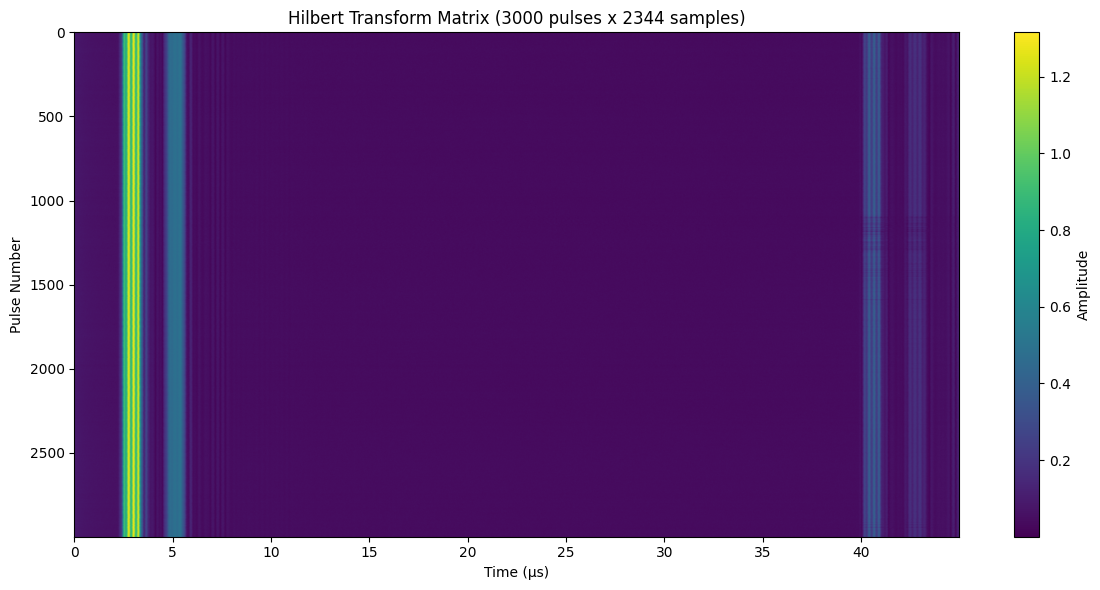

<Figure size 1500x1200 with 0 Axes>

In [41]:
import numpy as np
import scipy.io as sio
import torch
import matplotlib.pyplot as plt
from scipy import signal

def extract_amplitude_triggered_pulses(file_path, start_time=0.444, duration=0.001, 
                                    window_width=50e-6, amplitude_threshold=2.0):
    """
    Function to extract waveforms for a fixed time after amplitude reaches threshold
    Accelerate processing using GPU
    
    Parameters:
    -----------
    file_path : str
        Path to .mat file
    start_time : float
        Start time (seconds)
    duration : float
        Analysis time width (seconds)
    window_width : float
        Width of extraction window (seconds), default 50μs
    amplitude_threshold : float
        Amplitude threshold for triggering
    
    Returns:
    --------
    triggered_pulses : list
        List of triggered pulses
    adjusted_time_us : ndarray
        Adjusted time axis (μs)
    mean_pulse : ndarray
        Mean pulse waveform
    std_pulse : ndarray
        Standard deviation of pulse waveforms
    """
    # Load data
    print("Loading data...")
    mat_data = sio.loadmat(file_path)
    print("loading success")
    signal_data = np.squeeze(mat_data["TDX1"])
    Tinterval = float(mat_data['Tinterval'].item())
    Fs = 1.0 / Tinterval
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(device)
    # Extract data from specified time range
    start_idx = int(start_time * Fs)
    duration_samples = int(duration * Fs)
    chunk = signal_data[start_idx:start_idx + duration_samples]
    
    # Transfer to GPU
    chunk_tensor = torch.tensor(chunk, device=device, dtype=torch.float32)
    
    # Detect positions where amplitude exceeds threshold (GPU version)
    window_samples = int(window_width * Fs)
    
    # Detect positions exceeding threshold (parallel processing on GPU)
    threshold_mask = torch.abs(chunk_tensor) >= amplitude_threshold
    potential_triggers = torch.where(threshold_mask)[0].cpu().numpy()
    
    # Select trigger points (avoid duplicates)
    trigger_points = []
    last_trigger = -window_samples
    
    for trigger in potential_triggers:
        if trigger > last_trigger + window_samples:
            trigger_points.append(trigger)
            last_trigger = trigger
    
    # Extract waveforms from each trigger point
    # Initialize lists to store triggered pulses
    triggered_pulses = []  # Store raw pulse data
    
    # Prepare batch for GPU processing
    valid_triggers = [t for t in trigger_points if t + window_samples <= len(chunk)]
    n_pulses = len(valid_triggers)
    
    if n_pulses == 0:
        print("No valid pulses found")
        return [], np.array([]), np.array([]), np.array([])
    
    # Create tensor to store all pulses at once in GPU memory
    all_pulses_tensor = torch.zeros((n_pulses, window_samples), device=device)
    
    # Extract pulse from each trigger point
    for i, trigger in enumerate(valid_triggers):
        all_pulses_tensor[i] = chunk_tensor[trigger:trigger + window_samples]
        # Keep CPU list as well
        triggered_pulses.append(chunk[trigger:trigger + window_samples])
    
    # Remove initial reflection (set 0-55μs signal to 0)
    neglegible_time = 55e-6  # meaningless time
    zero_samples = int(neglegible_time * Fs)  # Calculate samples for 55μs
    
    processed_pulses_tensor = all_pulses_tensor.clone()
    processed_pulses_tensor[:, :zero_samples] = 0  # Set initial part to 0
    
    # Execute Hilbert transform on GPU (Since PyTorch doesn't have direct Hilbert transform,
    # transfer back to CPU and process with SciPy)
    processed_pulses_np = processed_pulses_tensor.cpu().numpy()
    
    # Apply Hilbert transform with batch processing
    from scipy.signal import hilbert
    hilbert_matrix = np.zeros_like(processed_pulses_np)
    
    for i in range(n_pulses):
        analytic_signal = hilbert(processed_pulses_np[i])
        hilbert_matrix[i] = np.abs(analytic_signal)
    
    # Transfer results back to GPU if needed
    hilbert_tensor = torch.tensor(hilbert_matrix, device=device)
    
    print(f"Found {n_pulses} triggered pulses")
    
    # Generate time axis (in μs)
    pulse_time_us = np.arange(window_samples) * Tinterval * 1e6
    
    # Time axis adjusted for zero point
    adjusted_time_us = np.arange(-zero_samples, window_samples-zero_samples) * Tinterval * 1e6
    
    print(f"Hilbert transform matrix shape: {hilbert_matrix.shape} (number of pulses x number of samples)")
    
    # Create Hilbert transform matrix excluding time from -60 to 0
    hilbert_matrix_trimmed = hilbert_matrix[:, zero_samples:]
    adjusted_time_us_trimmed = adjusted_time_us[adjusted_time_us >= 0]
    
    # Plot the entire matrix
    plt.figure(figsize=(12, 6))
    plt.imshow(hilbert_matrix_trimmed, aspect='auto', cmap='viridis', 
               extent=[0, adjusted_time_us_trimmed[-1], n_pulses-0.5, -0.5])
    plt.colorbar(label='Amplitude')
    plt.xlabel('Time (μs)')
    plt.ylabel('Pulse Number')
    plt.title(f'Hilbert Transform Matrix ({n_pulses} pulses x {hilbert_matrix_trimmed.shape[1]} samples)')
    plt.tight_layout()
    plt.show()
    # Calculate average waveform (executed on GPU)
    mean_pulse = torch.mean(all_pulses_tensor, dim=0).cpu().numpy()
    std_pulse = torch.std(all_pulses_tensor, dim=0).cpu().numpy()
    
    # Average waveform of Hilbert transform
    mean_hilbert = torch.mean(hilbert_tensor, dim=0).cpu().numpy()
    std_hilbert = torch.std(hilbert_tensor, dim=0).cpu().numpy()
    
    plt.figure(figsize=(15, 12))
    
    return triggered_pulses, adjusted_time_us, mean_pulse, std_pulse

# Usage example
file_path = "Z:\database\samples\P20240726-1600.mat"
#plot_signal_waveform(file_path, start_ms=100, end_ms=101)
pulses, time, mean_pulse, std_pulse = extract_amplitude_triggered_pulses(
    file_path,
    start_time=2.0, #seconds, measurement start point
    duration=1, #seconds, measurement time
    window_width=100e-6, #pulse occurs 3 times per 1ms as we're irradiating at 3kHz
    amplitude_threshold=2.0
)